In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
ds = pd.read_csv('Kivotou/res_elec_DS.csv')
ds

,CodeInsee,Dens_ins,Superficie,NiveauDeVieMedian,Inscrits,Abstentions_ins,B+N_ins,ARTHAUD.ins,ROUSSEL.ins,MACRON.ins,LASSALLE.ins,LE PEN.ins,ZEMMOUR.ins,MÉLENCHON.ins,HIDALGO.ins,JADOT.ins,PÉCRESSE.ins,POUTOU.ins,DUPONT-AIGNAN.ins
0,1001,40.438871,15.95,25350.0,645.0,16.744186,2.635659,0.465116,0.930233,23.255814,2.790698,23.100775,6.666667,10.232558,0.775194,4.651163,4.031008,0.465116,3.255814
1,1002,23.278689,9.15,23890.0,213.0,17.840376,1.877934,0.938967,3.286385,23.474178,4.694836,10.798122,6.572770,19.248826,1.408451,4.694836,3.755869,1.408451,0.000000
2,1004,356.300813,24.60,20420.0,8765.0,23.707929,1.528808,0.433542,1.973759,16.577296,2.019395,18.779236,6.046777,18.300057,1.277809,3.274387,3.525385,0.490588,2.065031
3,1005,80.527638,15.92,24270.0,1282.0,18.252730,1.560062,0.624025,1.482059,21.762871,1.872075,27.457098,6.006240,10.686427,1.092044,3.198128,3.744150,0.156006,2.106084
4,1007,60.536513,33.55,23160.0,2031.0,16.642048,1.674052,0.492368,2.264894,19.842442,2.954210,24.569178,6.942393,13.589365,1.526342,3.397341,3.791236,0.393895,1.920236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,2B354,3.430878,79.28,21670.0,272.0,50.000000,1.102941,0.000000,1.470588,11.764706,5.882353,7.352941,4.779412,8.088235,0.000000,3.308824,5.514706,0.367647,0.367647
31208,2B355,28.012279,13.03,17880.0,365.0,42.465753,5.479452,0.000000,0.821918,6.575342,6.575342,19.452055,8.767123,4.109589,0.273973,0.273973,3.835616,0.273973,1.095890
31209,2B356,14.621212,13.20,19360.0,193.0,46.113990,1.554404,1.554404,0.518135,9.326425,8.808290,12.435233,3.108808,4.145078,1.554404,2.072539,6.735751,1.036269,1.036269
31210,2B361,18.415418,14.01,19280.0,258.0,30.620155,1.550388,1.162791,1.550388,8.914729,8.139535,16.279070,6.976744,8.139535,0.387597,1.550388,12.015504,1.550388,1.162791


In [4]:
drop_col = ['B+N_ins','ARTHAUD.ins','ROUSSEL.ins','LASSALLE.ins','DUPONT-AIGNAN.ins','ZEMMOUR.ins','HIDALGO.ins','JADOT.ins','PÉCRESSE.ins','POUTOU.ins']
ds.drop(drop_col, axis = 1)

,CodeInsee,Dens_ins,Superficie,NiveauDeVieMedian,Inscrits,Abstentions_ins,MACRON.ins,LE PEN.ins,MÉLENCHON.ins
0,1001,40.438871,15.95,25350.0,645.0,16.744186,23.255814,23.100775,10.232558
1,1002,23.278689,9.15,23890.0,213.0,17.840376,23.474178,10.798122,19.248826
2,1004,356.300813,24.60,20420.0,8765.0,23.707929,16.577296,18.779236,18.300057
3,1005,80.527638,15.92,24270.0,1282.0,18.252730,21.762871,27.457098,10.686427
4,1007,60.536513,33.55,23160.0,2031.0,16.642048,19.842442,24.569178,13.589365
...,...,...,...,...,...,...,...,...,...
31207,2B354,3.430878,79.28,21670.0,272.0,50.000000,11.764706,7.352941,8.088235
31208,2B355,28.012279,13.03,17880.0,365.0,42.465753,6.575342,19.452055,4.109589
31209,2B356,14.621212,13.20,19360.0,193.0,46.113990,9.326425,12.435233,4.145078
31210,2B361,18.415418,14.01,19280.0,258.0,30.620155,8.914729,16.279070,8.139535


In [5]:
def lin_normalisation(X, minimum = False, maximum = False):
    if minimum is False:
        minimum = min(X)
    if maximum is False:
        maximum = max(X)
        
    res = (X - minimum)/(maximum - minimum)
    return res

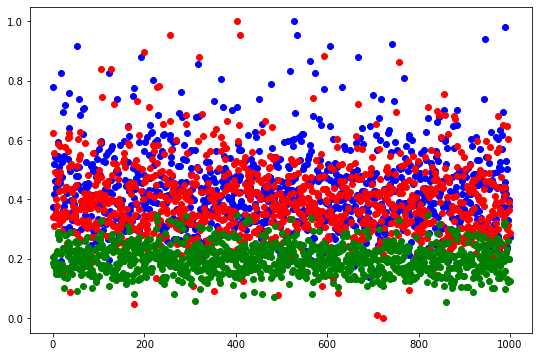

In [6]:
n_sample=1000
sample = ds.sample(n=n_sample)
X_train = np.array([sample['Dens_ins'].values, sample['NiveauDeVieMedian'].values]).T
y_train = np.array([sample['MACRON.ins'].values]).T
y2_train = np.array([sample['LE PEN.ins'].values]).T
y3_train = np.array([sample['MÉLENCHON.ins'].values]).T
X_train_0 = np.log(X_train.T[0]) / np.log(max(X_train.T[0]))
X_train_1 = lin_normalisation(X_train.T[1])
X_train = np.array([X_train_0, X_train_1]).T
y_train = lin_normalisation(y_train, minimum=0, maximum=100).reshape(n_sample,1)
y2_train = lin_normalisation(y2_train, minimum=0, maximum=100).reshape(n_sample,1)
y3_train = lin_normalisation(y3_train, minimum=0, maximum=100).reshape(n_sample,1)
plt.scatter(np.arange(len(X_train)),X_train.T[0],c='b')
plt.scatter(np.arange(len(X_train)),X_train.T[1],c="r")
plt.scatter(np.arange(len(y_train)),y_train,c="g")


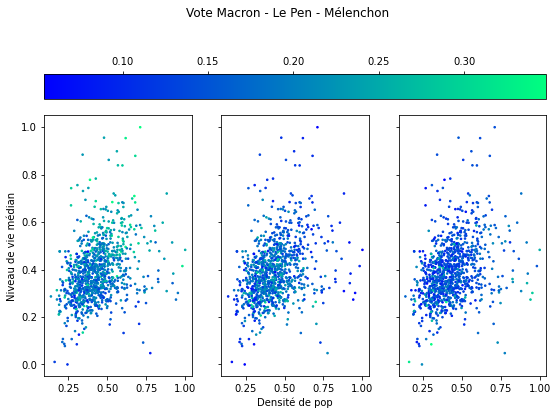

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True)
im0 = ax[0].scatter(X_train.T[0],X_train.T[1], cmap="winter", c=y_train, s=2.5)
ax[1].scatter(X_train.T[0],X_train.T[1], cmap="winter", c=y2_train, s=2.5)
ax[2].scatter(X_train.T[0],X_train.T[1], cmap="winter", c=y3_train, s=2.5)
ax[0].set(ylabel = 'Niveau de vie médian')
ax[1].set(xlabel = 'Densité de pop')
fig.suptitle('Vote Macron - Le Pen - Mélenchon')
fig.colorbar(im0, ax=ax, location = "top")

In [8]:
X_train.shape

(1000, 2)

In [9]:
from neurone_artificiel import *

100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 14245.01it/s]


précision :  -0.27113310085495823


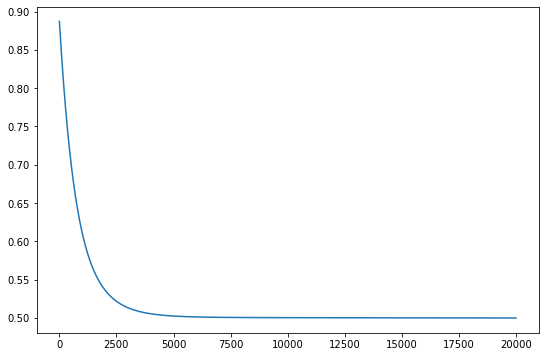

In [10]:
W, b = artificial_neuron(X_train, y_train, learning_rate=0.002, n_iter=20000)

In [11]:
b

array([-1.06155557])

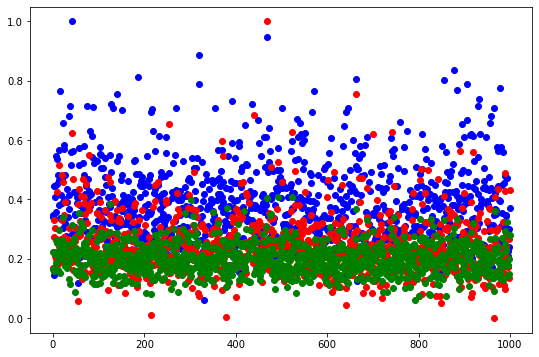

In [12]:
sample_test = ds.sample(n=n_sample)
X_test = np.array([sample_test['Dens_ins'].values, sample_test['NiveauDeVieMedian'].values]).T
y_test = np.array([sample_test['MACRON.ins'].values]).T
X_test_0 = np.log(X_test.T[0]) / np.log(max(X_test.T[0]))
X_test_1 = lin_normalisation(X_test.T[1])
X_test = np.array([X_test_0, X_test_1]).T
y_test = lin_normalisation(y_test, minimum=0, maximum=100).reshape(n_sample,1)
plt.scatter(np.arange(len(X_test)),X_test.T[0],c="b")
plt.scatter(np.arange(len(X_test)),X_test.T[1],c="r")
plt.scatter(np.arange(len(y_test)),y_test,c="g")

In [13]:
y_pred = predict(X_test, W, b)

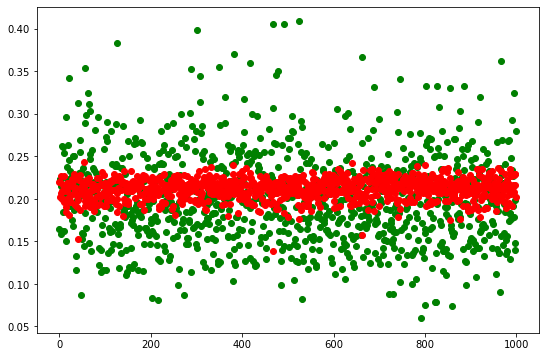

In [15]:
plt.scatter(np.arange(len(y_test)),y_test,c="g")
plt.scatter(np.arange(len(y_pred)),y_pred,c="r")

In [16]:
a0 = 0.2
z0 = - np.log(1 / a0 - 1)
x0 = np.linspace(0,1,100)
x1 = (z0 - W[0] * x0 - b)/ W[1]
x1

array([ 0.89780823,  0.88594583,  0.87408344,  0.86222105,  0.85035865,
        0.83849626,  0.82663386,  0.81477147,  0.80290908,  0.79104668,
        0.77918429,  0.7673219 ,  0.7554595 ,  0.74359711,  0.73173472,
        0.71987232,  0.70800993,  0.69614754,  0.68428514,  0.67242275,
        0.66056036,  0.64869796,  0.63683557,  0.62497318,  0.61311078,
        0.60124839,  0.58938599,  0.5775236 ,  0.56566121,  0.55379881,
        0.54193642,  0.53007403,  0.51821163,  0.50634924,  0.49448685,
        0.48262445,  0.47076206,  0.45889967,  0.44703727,  0.43517488,
        0.42331249,  0.41145009,  0.3995877 ,  0.3877253 ,  0.37586291,
        0.36400052,  0.35213812,  0.34027573,  0.32841334,  0.31655094,
        0.30468855,  0.29282616,  0.28096376,  0.26910137,  0.25723898,
        0.24537658,  0.23351419,  0.2216518 ,  0.2097894 ,  0.19792701,
        0.18606462,  0.17420222,  0.16233983,  0.15047743,  0.13861504,
        0.12675265,  0.11489025,  0.10302786,  0.09116547,  0.07

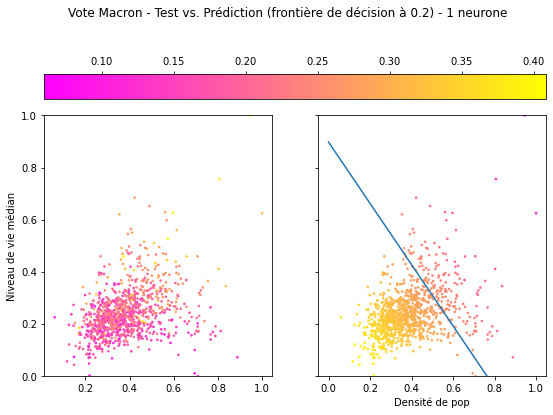

In [17]:
colormap = "spring"
fig, ax = plt.subplots(1, 2, sharey=True)
im0 = ax[0].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_test, s=2.5)
ax[1].scatter(X_test.T[0],X_test.T[1], cmap=colormap, c=y_pred, s=2.5)
ax[1].plot(x0, x1)
ax[0].set(ylabel = 'Niveau de vie médian')
ax[1].set(xlabel = 'Densité de pop')
ax[0].set_ylim([0,1])
fig.suptitle('Vote Macron - Test vs. Prédiction (frontière de décision à ' + str(a0) + ') - 1 neurone')
fig.colorbar(im0, ax=ax, location = "top")
plt.savefig('macron_1neurone.png')